#### 論文
・You Only Look Once: Unified, Real-Time Object Detection<br>
https://arxiv.org/pdf/1506.02640.pdf<br>
・SSD: Single Shot MultiBox Detector<br>
https://arxiv.org/pdf/1512.02325.pdf<br>
・Deep Residual Learning for Image Recognition<br>
https://arxiv.org/pdf/1512.03385.pdf<br>

# You Only Look Once: Unified, Real-Time Object Detection

## what　どんな内容？
YOLO。<br>
物体検出の高速に秀でたもの。<br>
速さに特化しており、精度はFaster-RCNNより少し落ちる。<br>

性能はこんな感じ。<br>
速さ：かなり早い<br>
予測精度：従来より拡大と縮小<br>


◾️物体検出<br>
・バウンディングボックスのずれの誤差(error)が大きめ<br>

◾️引用<br>
We present YOLO, a new approach to object detection.
Prior work on object detection repurposes classifiers to perform detection. Instead, we frame object detection as a regression problem to spatially separated bounding boxes and
associated class probabilities. A single neural network predicts bounding boxes and class probabilities directly from
full images in one evaluation. Since the whole detection
pipeline is a single network, it can be optimized end-to-end
directly on detection performance.
Our unified architecture is extremely fast. Our base
YOLO model processes images in real-time at 45 frames
per second. A smaller version of the network, Fast YOLO,
processes an astounding 155 frames per second while
still achieving double the mAP of other real-time detectors. Compared to state-of-the-art detection systems, YOLO
makes more localization errors but is less likely to predict
false positives on background. Finally, YOLO learns very
general representations of objects. It outperforms other detection methods, including DPM and R-CNN, when generalizing from natural images to other domains like artwork.<br>


## 技術の肝
高速化の理由としては、one-stageに変えたことが１番大きい。<br>
技術では画像をS＊Sのgridに分断して、そこからバウンディングボックスを、グリッドに合わせ全ての検証し、信頼スコアがあるもの、ないものを算出している。<br>
また、画像から同時に類似度を排出してグルーピングを行う<br>
誤差に関してもgrand-truthを使って、x,y,w,hで保存している<br>

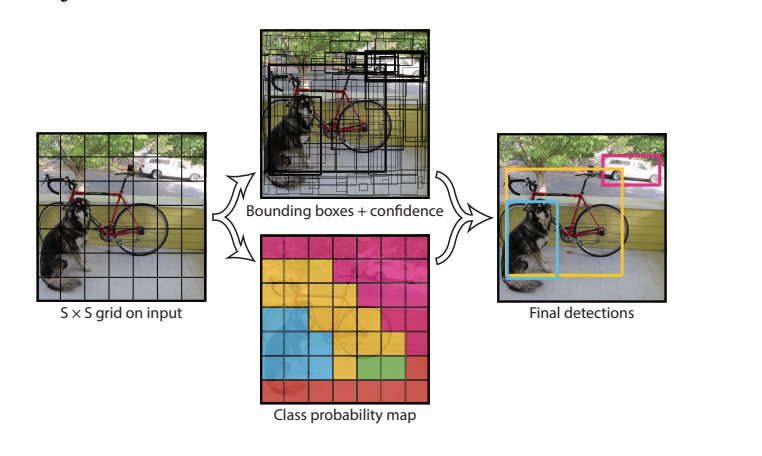

ちなみに層は以下
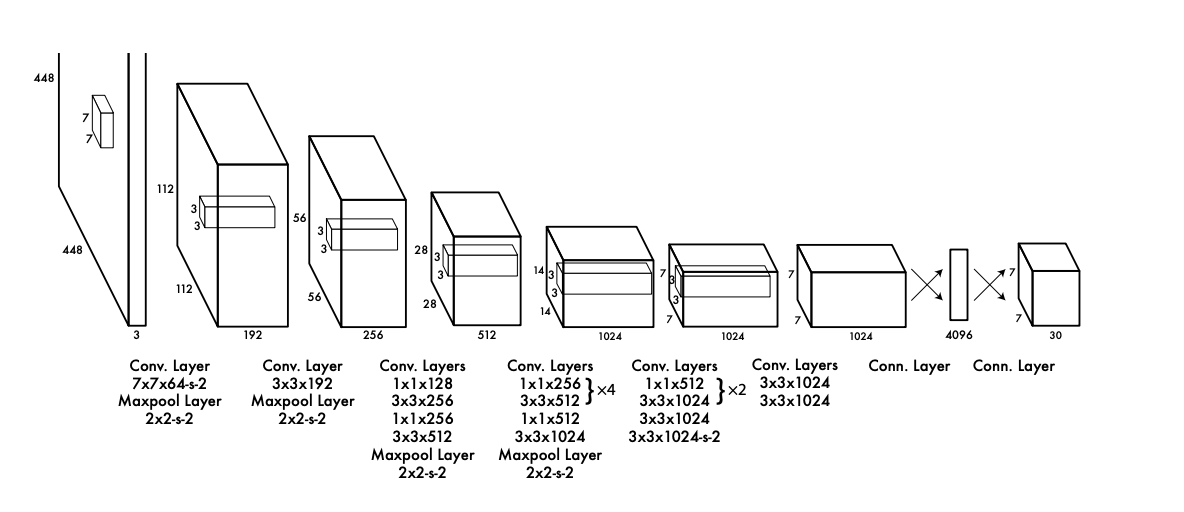


## 先行研究と比べてどう？
１つのニューラルでバウンディングボックスを作る点とクラス分類両方行っている。（one-stage）<br>
従来は提案領域と、画像を分析するネットワークが分断されているが、今回のは繋がってており、全ての画像を直接訓練している。<br>
また、すべての層が繋がっているのでlossも物体検出と、精度面で両方に利用している。<br>
物体検出までの速度もかなり短縮できた。<br>
predictの精度も他のモデルと比較すると高め。<br>

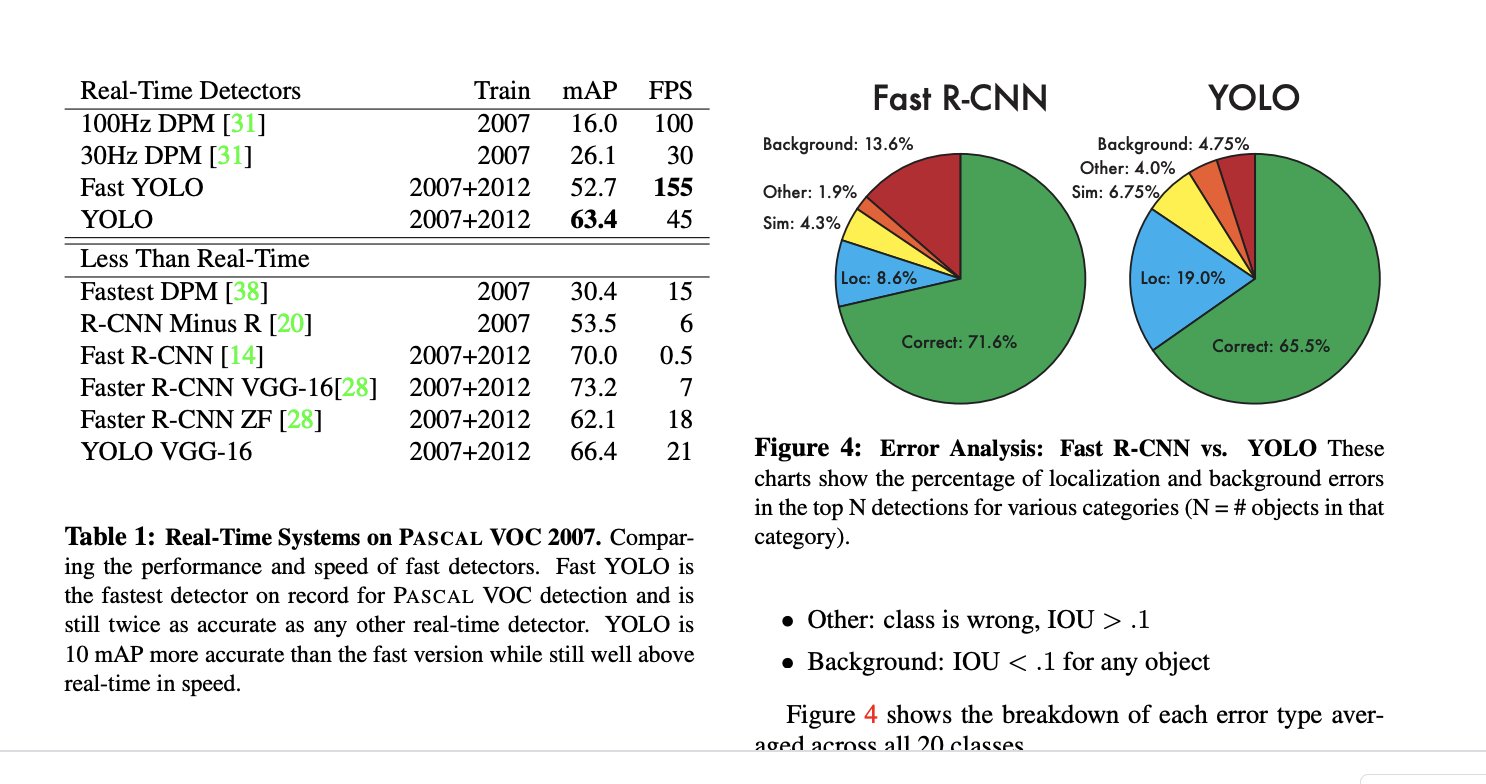


◾️引用<br>
We introduce YOLO, a unified model for object detection. Our model is simple to construct and can be trained
directly on full images. Unlike classifier-based approaches,
YOLO is trained on a loss function that directly corresponds
to detection performance and the entire model is trained
jointly.
Fast YOLO is the fastest general-purpose object detector in the literature and YOLO pushes the state-of-the-art in
real-time object detection. YOLO also generalizes well to
new domains making it ideal<br>

## 検証方法
リアルタイム(30fps以上)での物体検知と、物体検知（30Fps以下）を下記にて検証。<br>

リアルタイムの速さ、精度ともに優勢。<br>
物体検知（30Fps以下）では速さは優勢、精度は真ん中くらい。<br>
デメリットは、エラーの部分。<br>

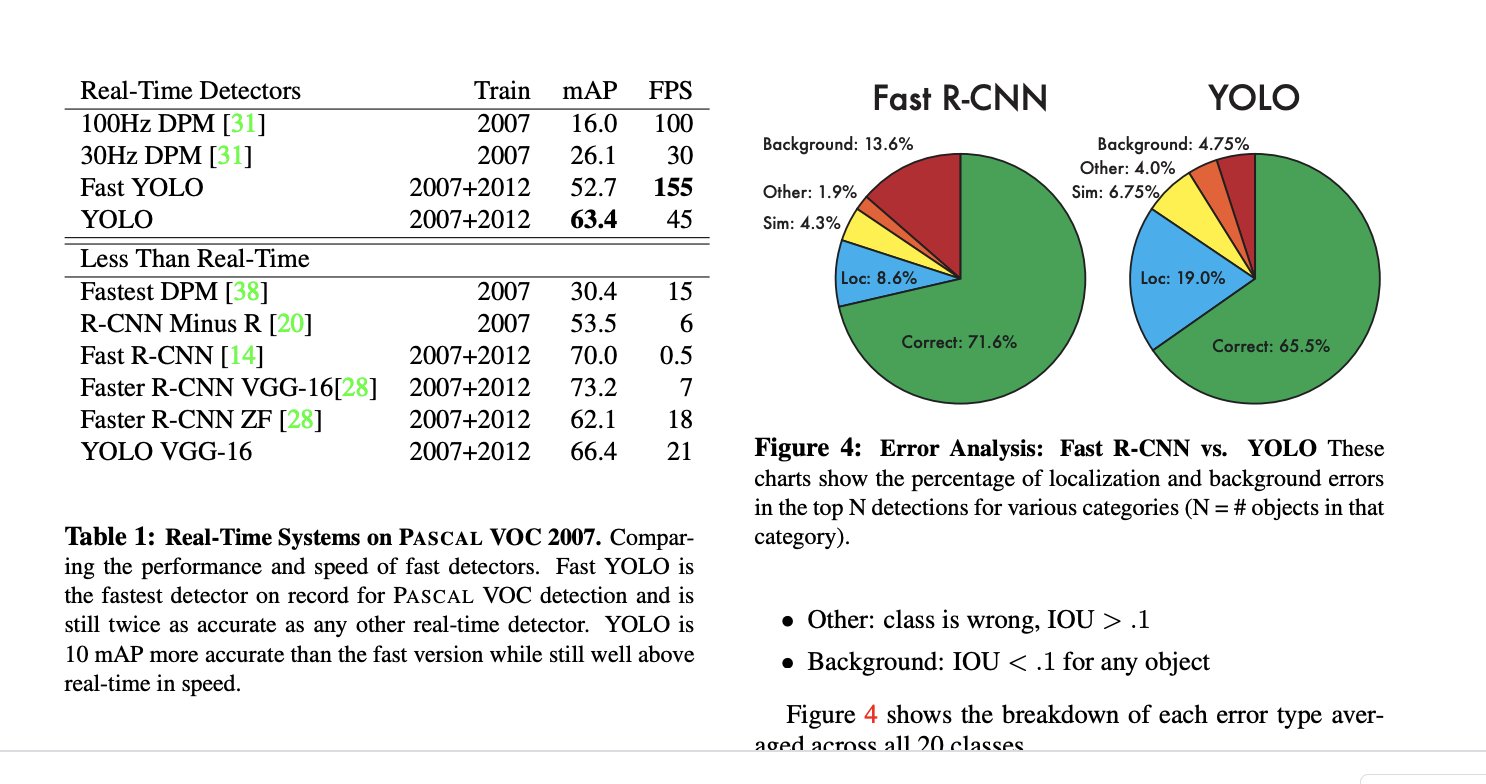

そこで、お互いのデメリットを消せるのではないかと思い、YOLOとfast-RCNNを混ぜてみた。<br>
以下結果。
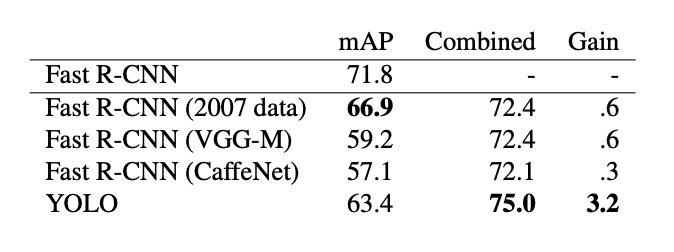


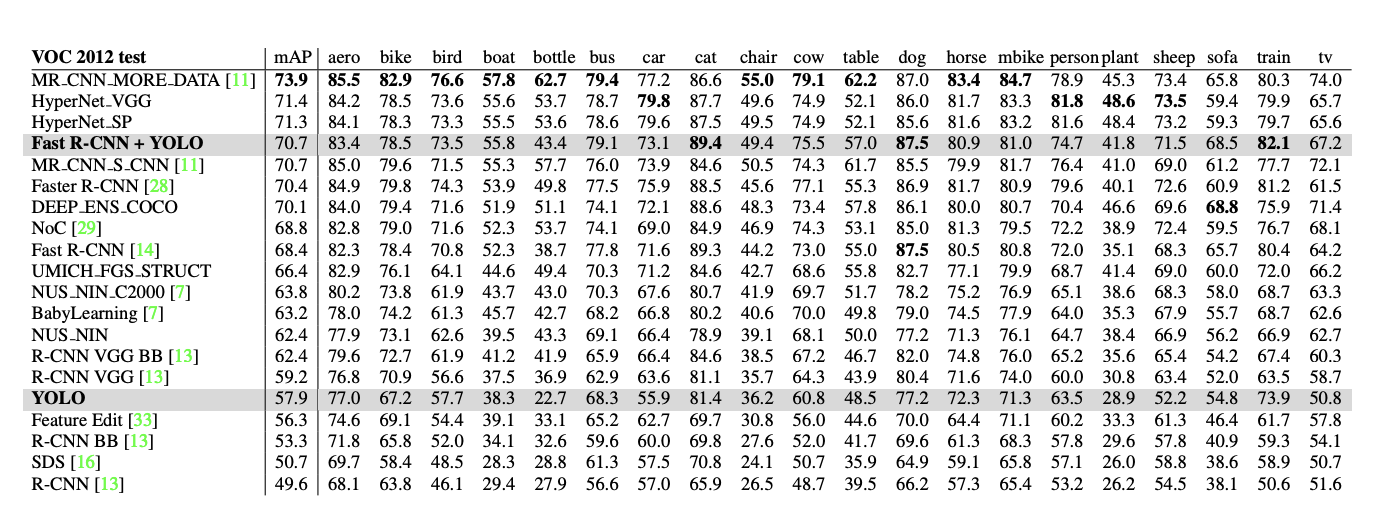

精度が大きく向上している。<br>

## 新たな議論（話がなければ記載なしでOK）
自動運転などでは、リアルタイム物体検出か、30fps以下の物体検出どちらを使うべきか議題に上がりそうだが、リアルタイム物体検出では相対的に精度が落ちている傾向があるように見える。<br>
精度も速度も求められる自動運転ではあるが、30fps以下だと、車の認知できる量が相対的に減ってしまう分危険だと個人的な意見（検出仕切れないのでは？事故の元になりそう）を持っているので、リアルタイムでの物体検出が主役になりそうで、リアルタイム物体検出の精度を求める研究が今後進みそうな感覚。<br>
（時速制限をつけた車なら、30fpsに限りなく近い物体検出では、精度も出しつつ可能だったりするかも。
その時は、YOLOとfaster RCNNをマージしたものを使えば、速さと精度を担保できるか）


## 結論
 YOLOはreal-timeで検出できるように高速で作られて構築も簡単。<br>
また、新しいドメイン分野でも汎用性が高く、画像の変化に強いロバスト性を持っている<br>

## 次読むべき論文
fast-YOLO

# SSD: Single Shot MultiBox Detector


## what　どんな内容？
SSDの紹介。<br>
１つのDNNから構成されているYOLOと同じone-stage手法。<br>
速さと精度で先行研究と比べてとても早い。<br>

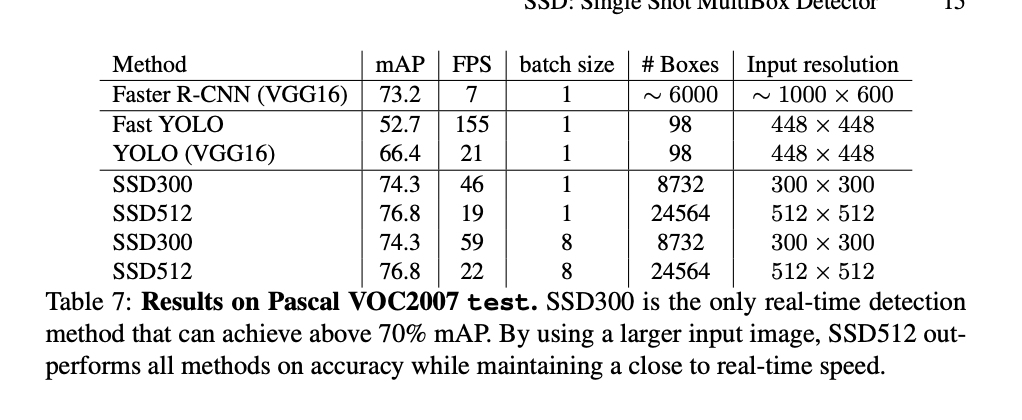


## 技術の肝 
入力データから保存する領域は、位置情報とクラス情報。<br>
特徴量マップからデータを抽出している。<br>
anchor boxの概念があって、それとデフォルトボックス（アスペクト比*スケール）の重なっている部分をスコアとして出している。⇨　スコアが良い位置情報（アンカー）とクラスラベルを保存する。<br>

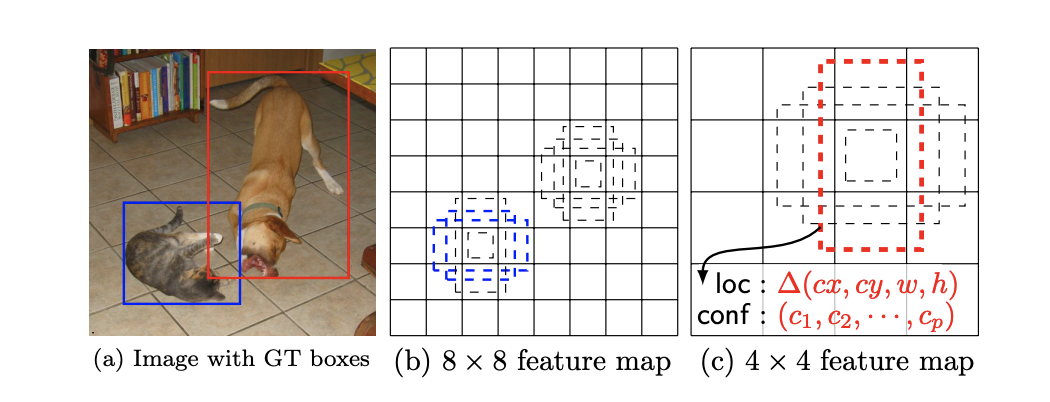


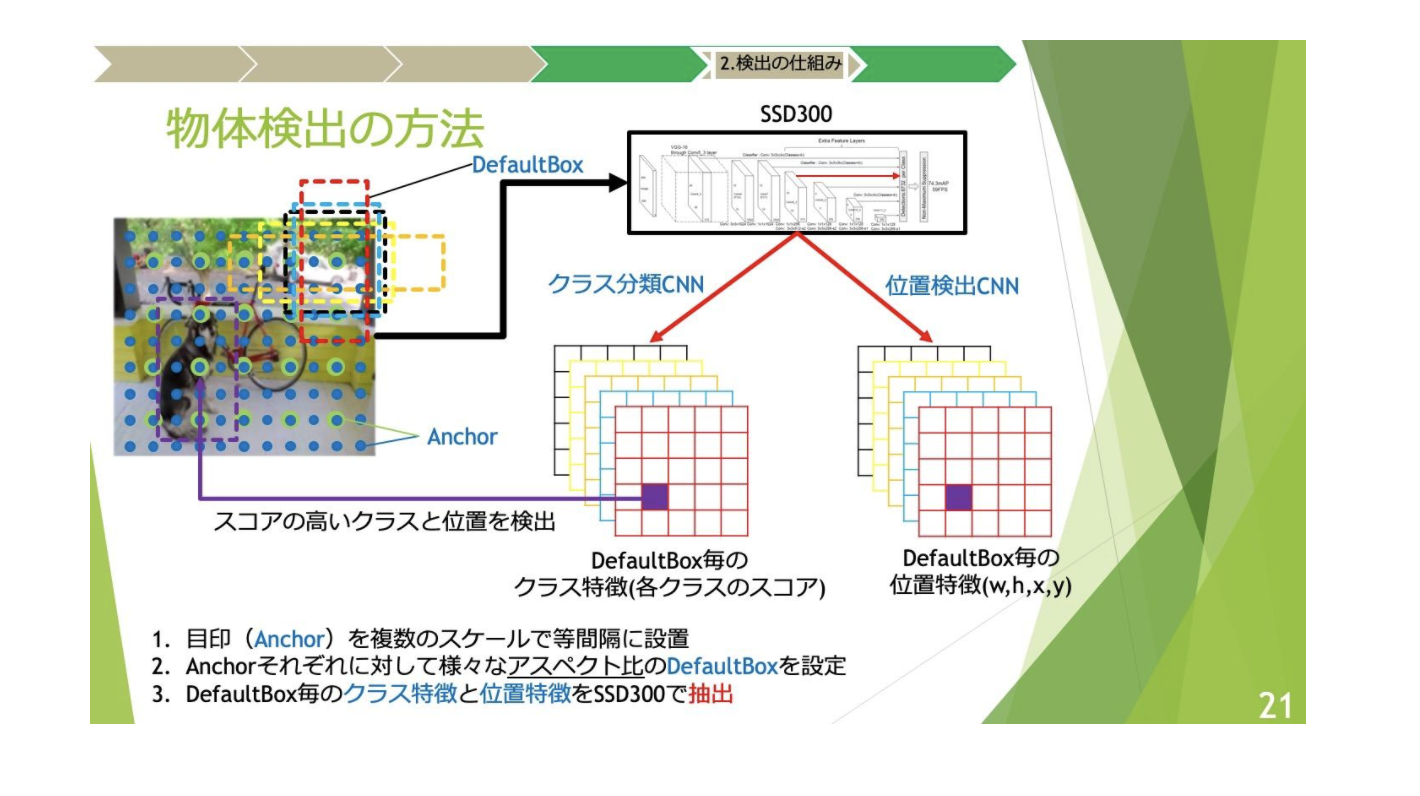


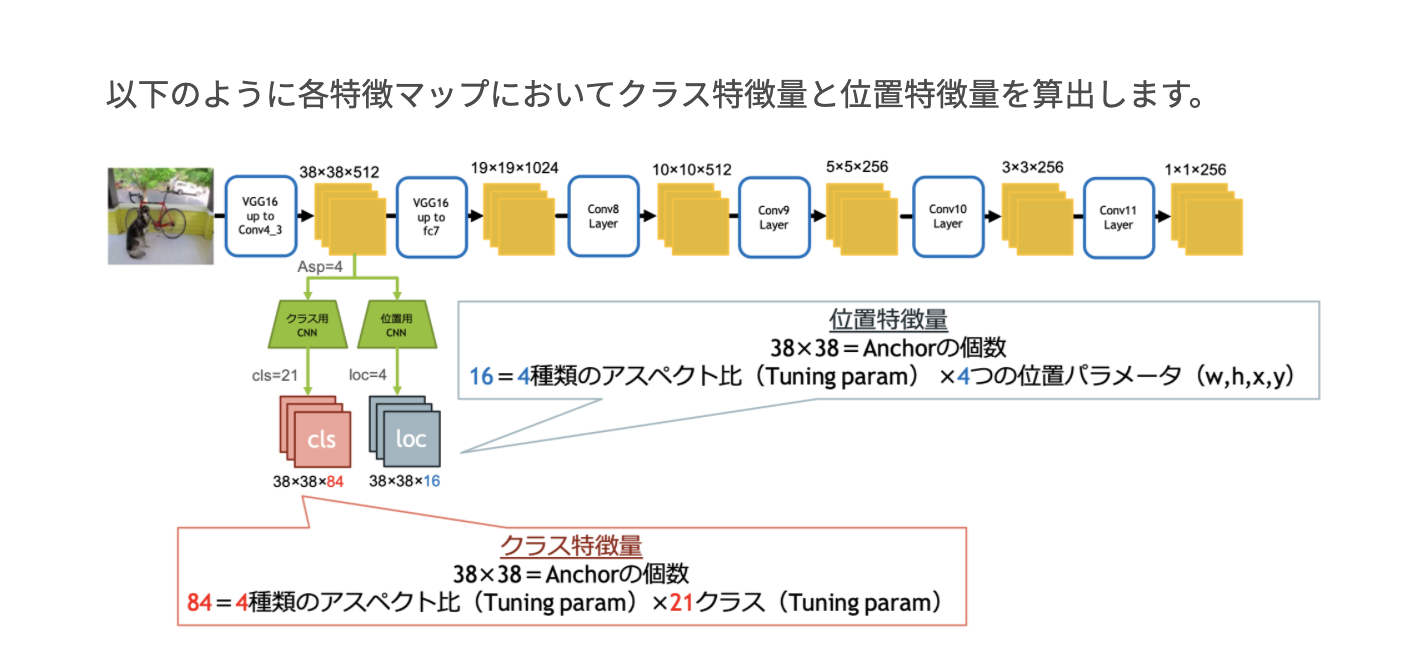


【参考文献】
・https://www.acceluniverse.com/blog/developers/2020/02/SSD.html


## 先行研究と比べてどう？
mAPでは 画像サイズが拡大〜縮小しようが、Faster-RCNNよりも精度が良い。<br>
同じVGG-16ベースのアーキテクチャを用いた場合，SSDは最先端の手法と比較しても精度、速度ともに極めて高い<br>
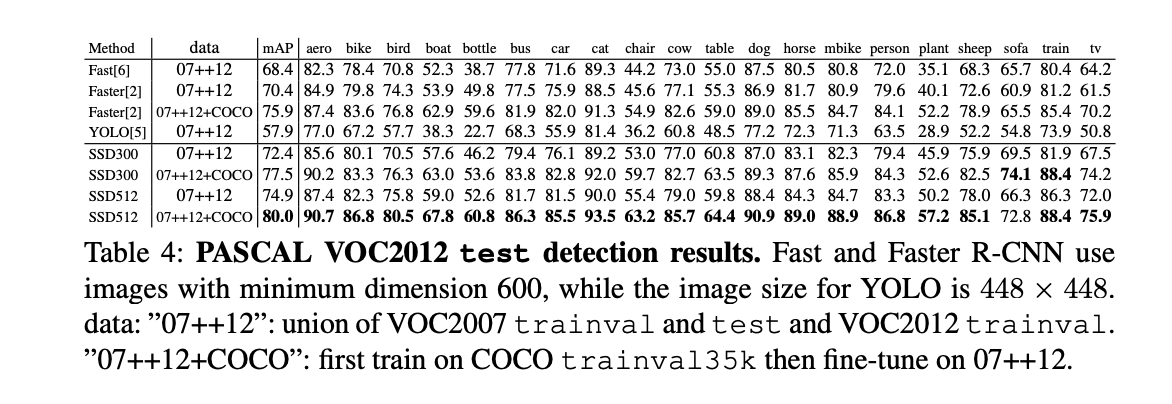
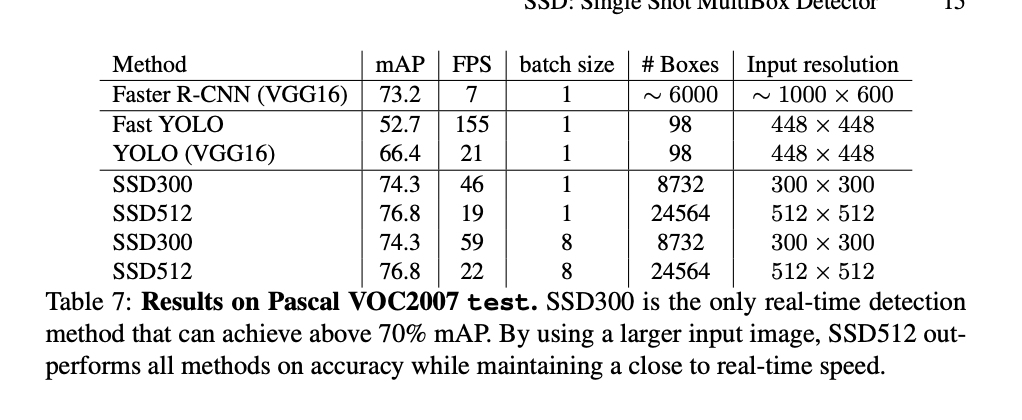

## 検証方法
SSDと、faster-RCNN同士で精度の良さを PASCAL VOC2007, COCOのデータセットで比較している<br>
全てSSDが精度が良い結果になっており、ぱっと見上位互換のように見える。<br>

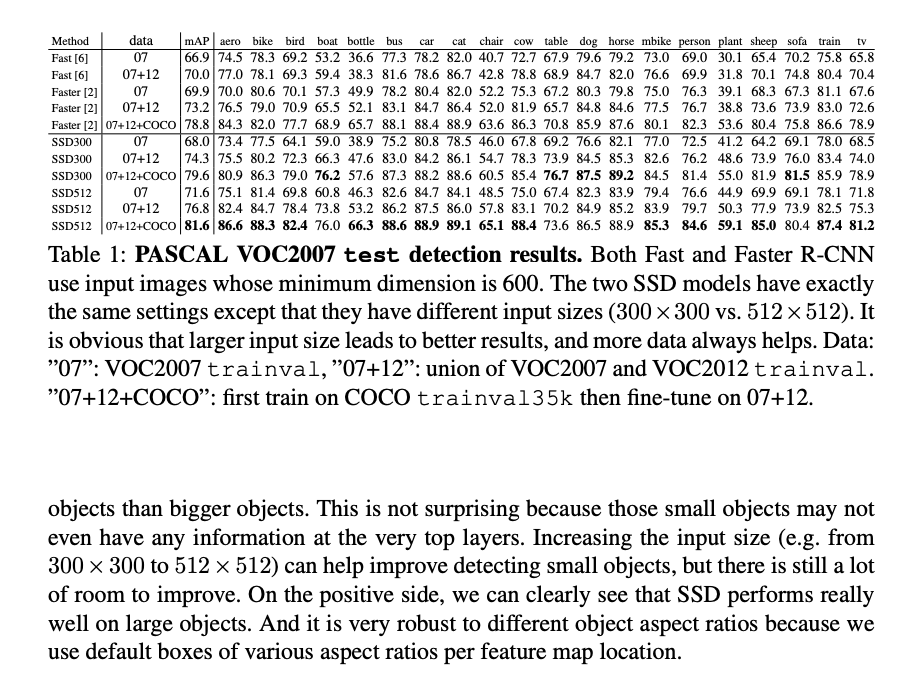

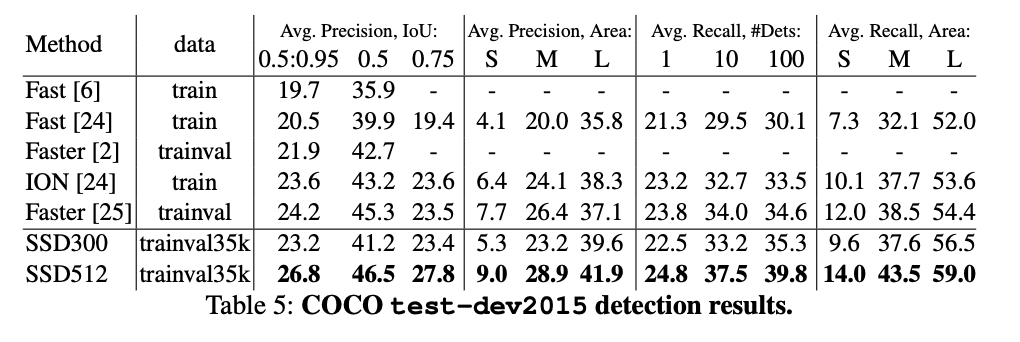


## 次読むべき論文
YOLOのバージョンアップの論文

# Deep Residual Learning for Image Recognition

## what　どんな内容？
Resnet。<br>
2015年に発表された残差関数を使い、層を大幅に増やす事で精度が向上したことを証明しているモデル。<br>
当時は分類モデルの中で最も精度が良かった。<br>


## 技術の肝 
フォワードでの重み接続を、１つ以上の畳み込み層をショートカットする方法を用いて、残差を減らしている。<br>
（通常通り、NNの層を増やすと、残差は増えてしまう）<br>

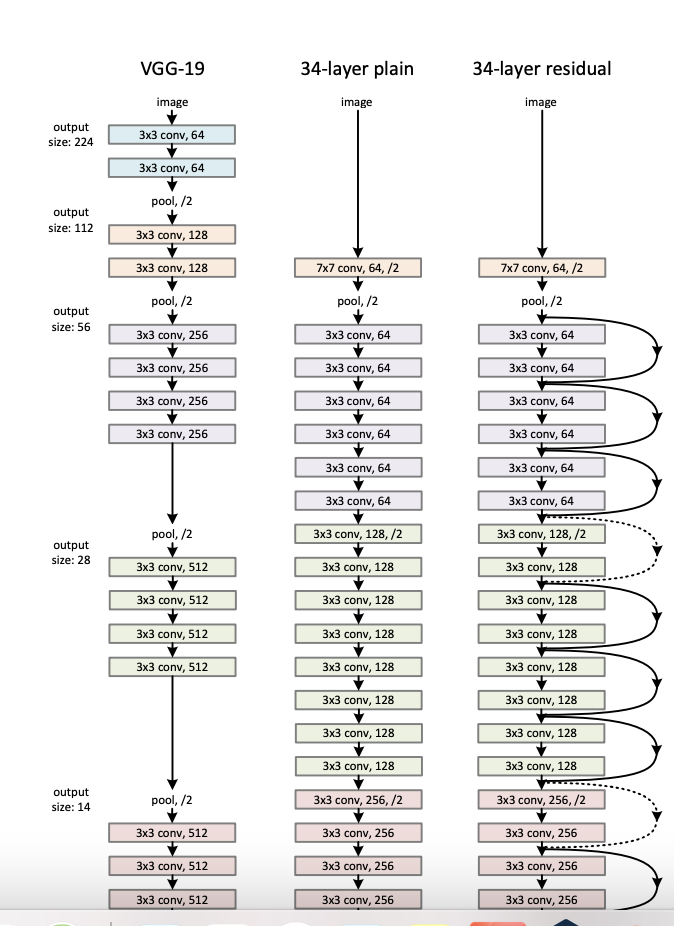


## 先行研究と比べてどう？
ImageNet 検出，ImageNet ローカライゼーション，COCO 検出，COCO セグメンテーションの各タスクで 1 位を獲得

## 検証方法
ImageNet 2012分類データセットを利用。<br>
plain-netでは、層を増やした場合の方が誤差が大きい。<br>
ResNetでは逆で、またplainとResNetを比較しても誤差は後者が小さい。<br>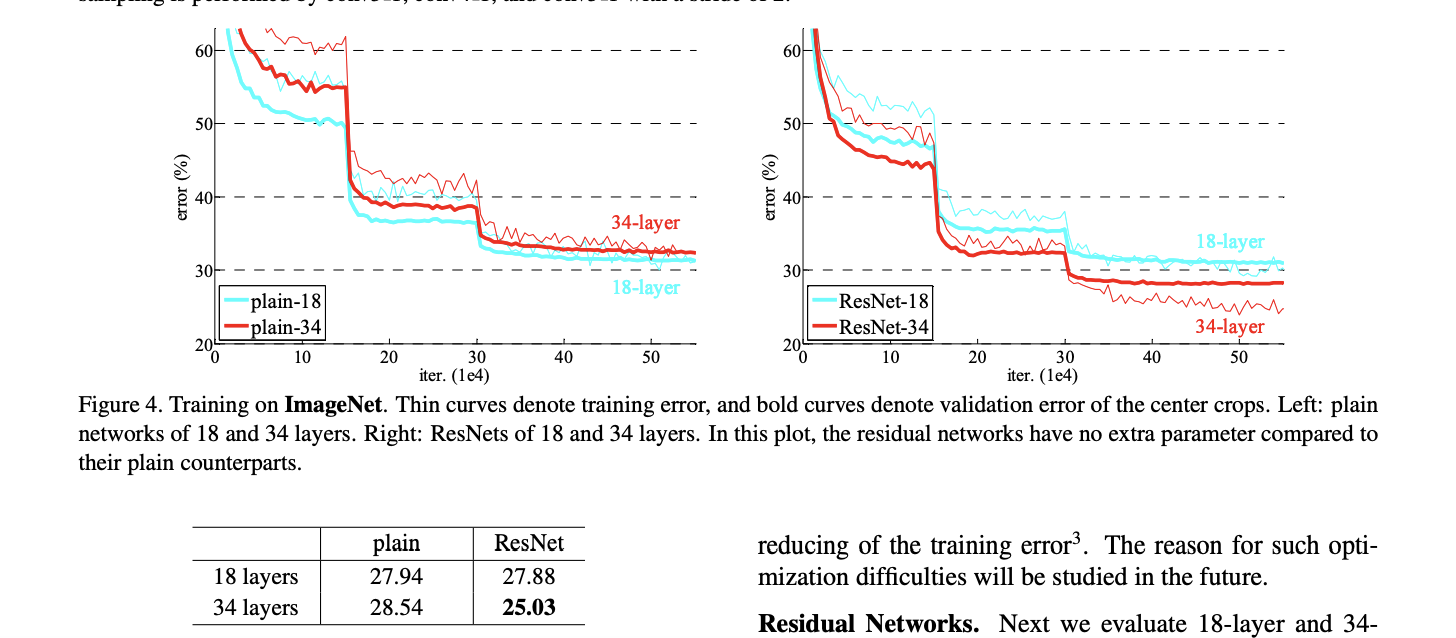


## 次読むべき論文
MobileNet：